In [1]:
# Build a machine learning model to predict user will click the ad or not
# based on his experience and estimated salary for a given dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#feature selection 
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [4]:
#splitting the dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [6]:
#fitting svm to the training dataset
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [7]:
#predicting the train set result
y_pred=clf_model.predict(x_train)
dataset=pd.DataFrame({'Actual':y_train,'Predicted':y_pred})
dataset.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,1
3,0,0
4,1,1


In [9]:
#predicting the test set result
y_predict=clf_model.predict(x_test)

In [10]:
import sklearn
#check accuracy for X train data
Acc_Train=sklearn.metrics.balanced_accuracy_score(y_pred,y_train)*100
print(Acc_Train)

90.12928022361984


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


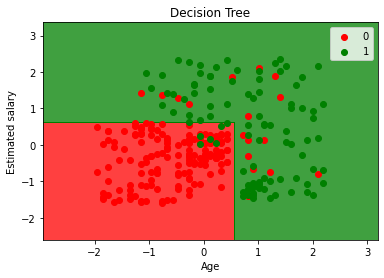

In [13]:

#visualizing the training set result
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,clf_model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Decision Tree')
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()